# Logistic regression in MNIST data


## Introduction

In this exercise, you will implement the backpropagation algorithm for neural networks and apply it to the task of hand-written digit recognition. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.


All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook. The assignment can be promptly submitted to the coursera grader directly from this notebook (code and instructions are included below).


## Read data and process data



In [2]:
from keras.datasets import mnist
import numpy as np


# load data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# estudiemos los tamanos de los retornos
print("The size of train_x is : {}".format(train_x.shape))
print("The size of train_y is : {}".format(train_y.shape))
print("The size of test_x is : {}".format(test_x.shape))
print("The size of test_y is : {}".format(test_y.shape))



The size of train_x is : (60000, 28, 28)
The size of train_y is : (60000,)
The size of test_x is : (10000, 28, 28)
The size of test_y is : (10000,)


In [4]:
# reshape de los datos de entrenamiento a tensores de orden 3
train_x = train_x.reshape(train_x.shape[0], 28, 28)
test_x = test_x.reshape(test_x.shape[0], 28, 28)

# normalizamos
train_x = train_x/255.0
test_x = test_x/255.0

train_y.shape

(60000,)

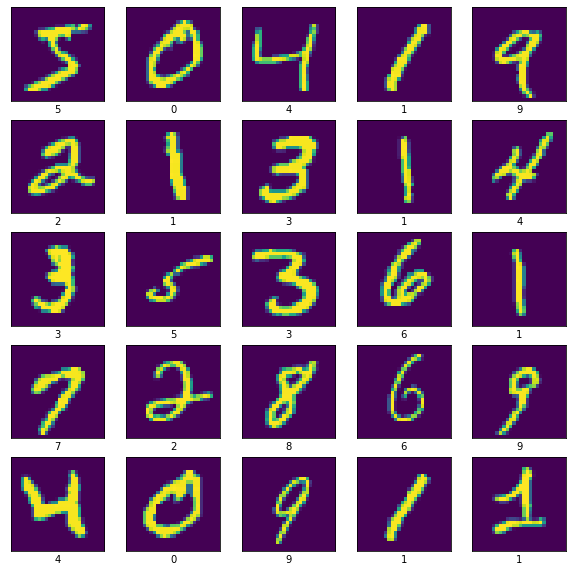

In [5]:
# miremos algunos datos (images)
import matplotlib.pyplot as plt
import numpy
import numpy as np
plt.figure(figsize=(10,10))



# grafique 25 (5 x 5) imagenes
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i])
    plt.xlabel("{}".format(train_y[i]))

In [6]:
# reshape the images into 28x28=784
ntrain_x = train_x.reshape(train_x.shape[0], 784)
nttest_x = test_x.reshape(test_x.shape[0], 784)
print(ntrain_x.shape, nttest_x.shape)

(60000, 784) (10000, 784)


In [7]:
# define the sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))